In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
df = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv',)

In [4]:
df = df.drop('sl_no',axis=1)

In [5]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [7]:
df['salary'] = df['salary'].fillna(df['salary'].mean(),axis=0)

In [8]:
df['ssc_p'] = df['ssc_p'].astype(int)
df['hsc_p'] = df['hsc_p'].astype(int)
df['degree_p'] = df['degree_p'].astype(int)
df['etest_p'] = df['etest_p'].astype(int)
df['mba_p'] = df['mba_p'].astype(int)
df['salary'] = df['salary'].astype(int)

In [9]:
df['status'] = df['status'].map({'Placed':1,'Not Placed':0})

In [10]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67,Others,91,Others,Commerce,58,Sci&Tech,No,55,Mkt&HR,58,1,270000
1,M,79,Central,78,Others,Science,77,Sci&Tech,Yes,86,Mkt&Fin,66,1,200000
2,M,65,Central,68,Central,Arts,64,Comm&Mgmt,No,75,Mkt&Fin,57,1,250000
3,M,56,Central,52,Central,Science,52,Sci&Tech,No,66,Mkt&HR,59,0,288655
4,M,85,Central,73,Central,Commerce,73,Comm&Mgmt,No,96,Mkt&Fin,55,1,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80,Others,82,Others,Commerce,77,Comm&Mgmt,No,91,Mkt&Fin,74,1,400000
211,M,58,Others,60,Others,Science,72,Sci&Tech,No,74,Mkt&Fin,53,1,275000
212,M,67,Others,67,Others,Commerce,73,Comm&Mgmt,Yes,59,Mkt&Fin,69,1,295000
213,F,74,Others,66,Others,Commerce,58,Comm&Mgmt,No,70,Mkt&HR,60,1,204000


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label = LabelEncoder()

In [13]:
df['gender'] = label.fit_transform(df['gender'])
df['ssc_b'] = label.fit_transform(df['ssc_b'])
df['hsc_b'] = label.fit_transform(df['hsc_b'])
df['hsc_s'] = label.fit_transform(df['hsc_s'])
df['degree_t'] = label.fit_transform(df['degree_t'])
df['workex'] = label.fit_transform(df['workex'])
df['specialisation'] = label.fit_transform(df['specialisation'])


In [14]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67,1,91,1,1,58,2,0,55,1,58,1,270000
1,1,79,0,78,1,2,77,2,1,86,0,66,1,200000
2,1,65,0,68,0,0,64,0,0,75,0,57,1,250000
3,1,56,0,52,0,2,52,2,0,66,1,59,0,288655
4,1,85,0,73,0,1,73,0,0,96,0,55,1,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80,1,82,1,1,77,0,0,91,0,74,1,400000
211,1,58,1,60,1,2,72,2,0,74,0,53,1,275000
212,1,67,1,67,1,1,73,0,1,59,0,69,1,295000
213,0,74,1,66,1,1,58,0,0,70,1,60,1,204000


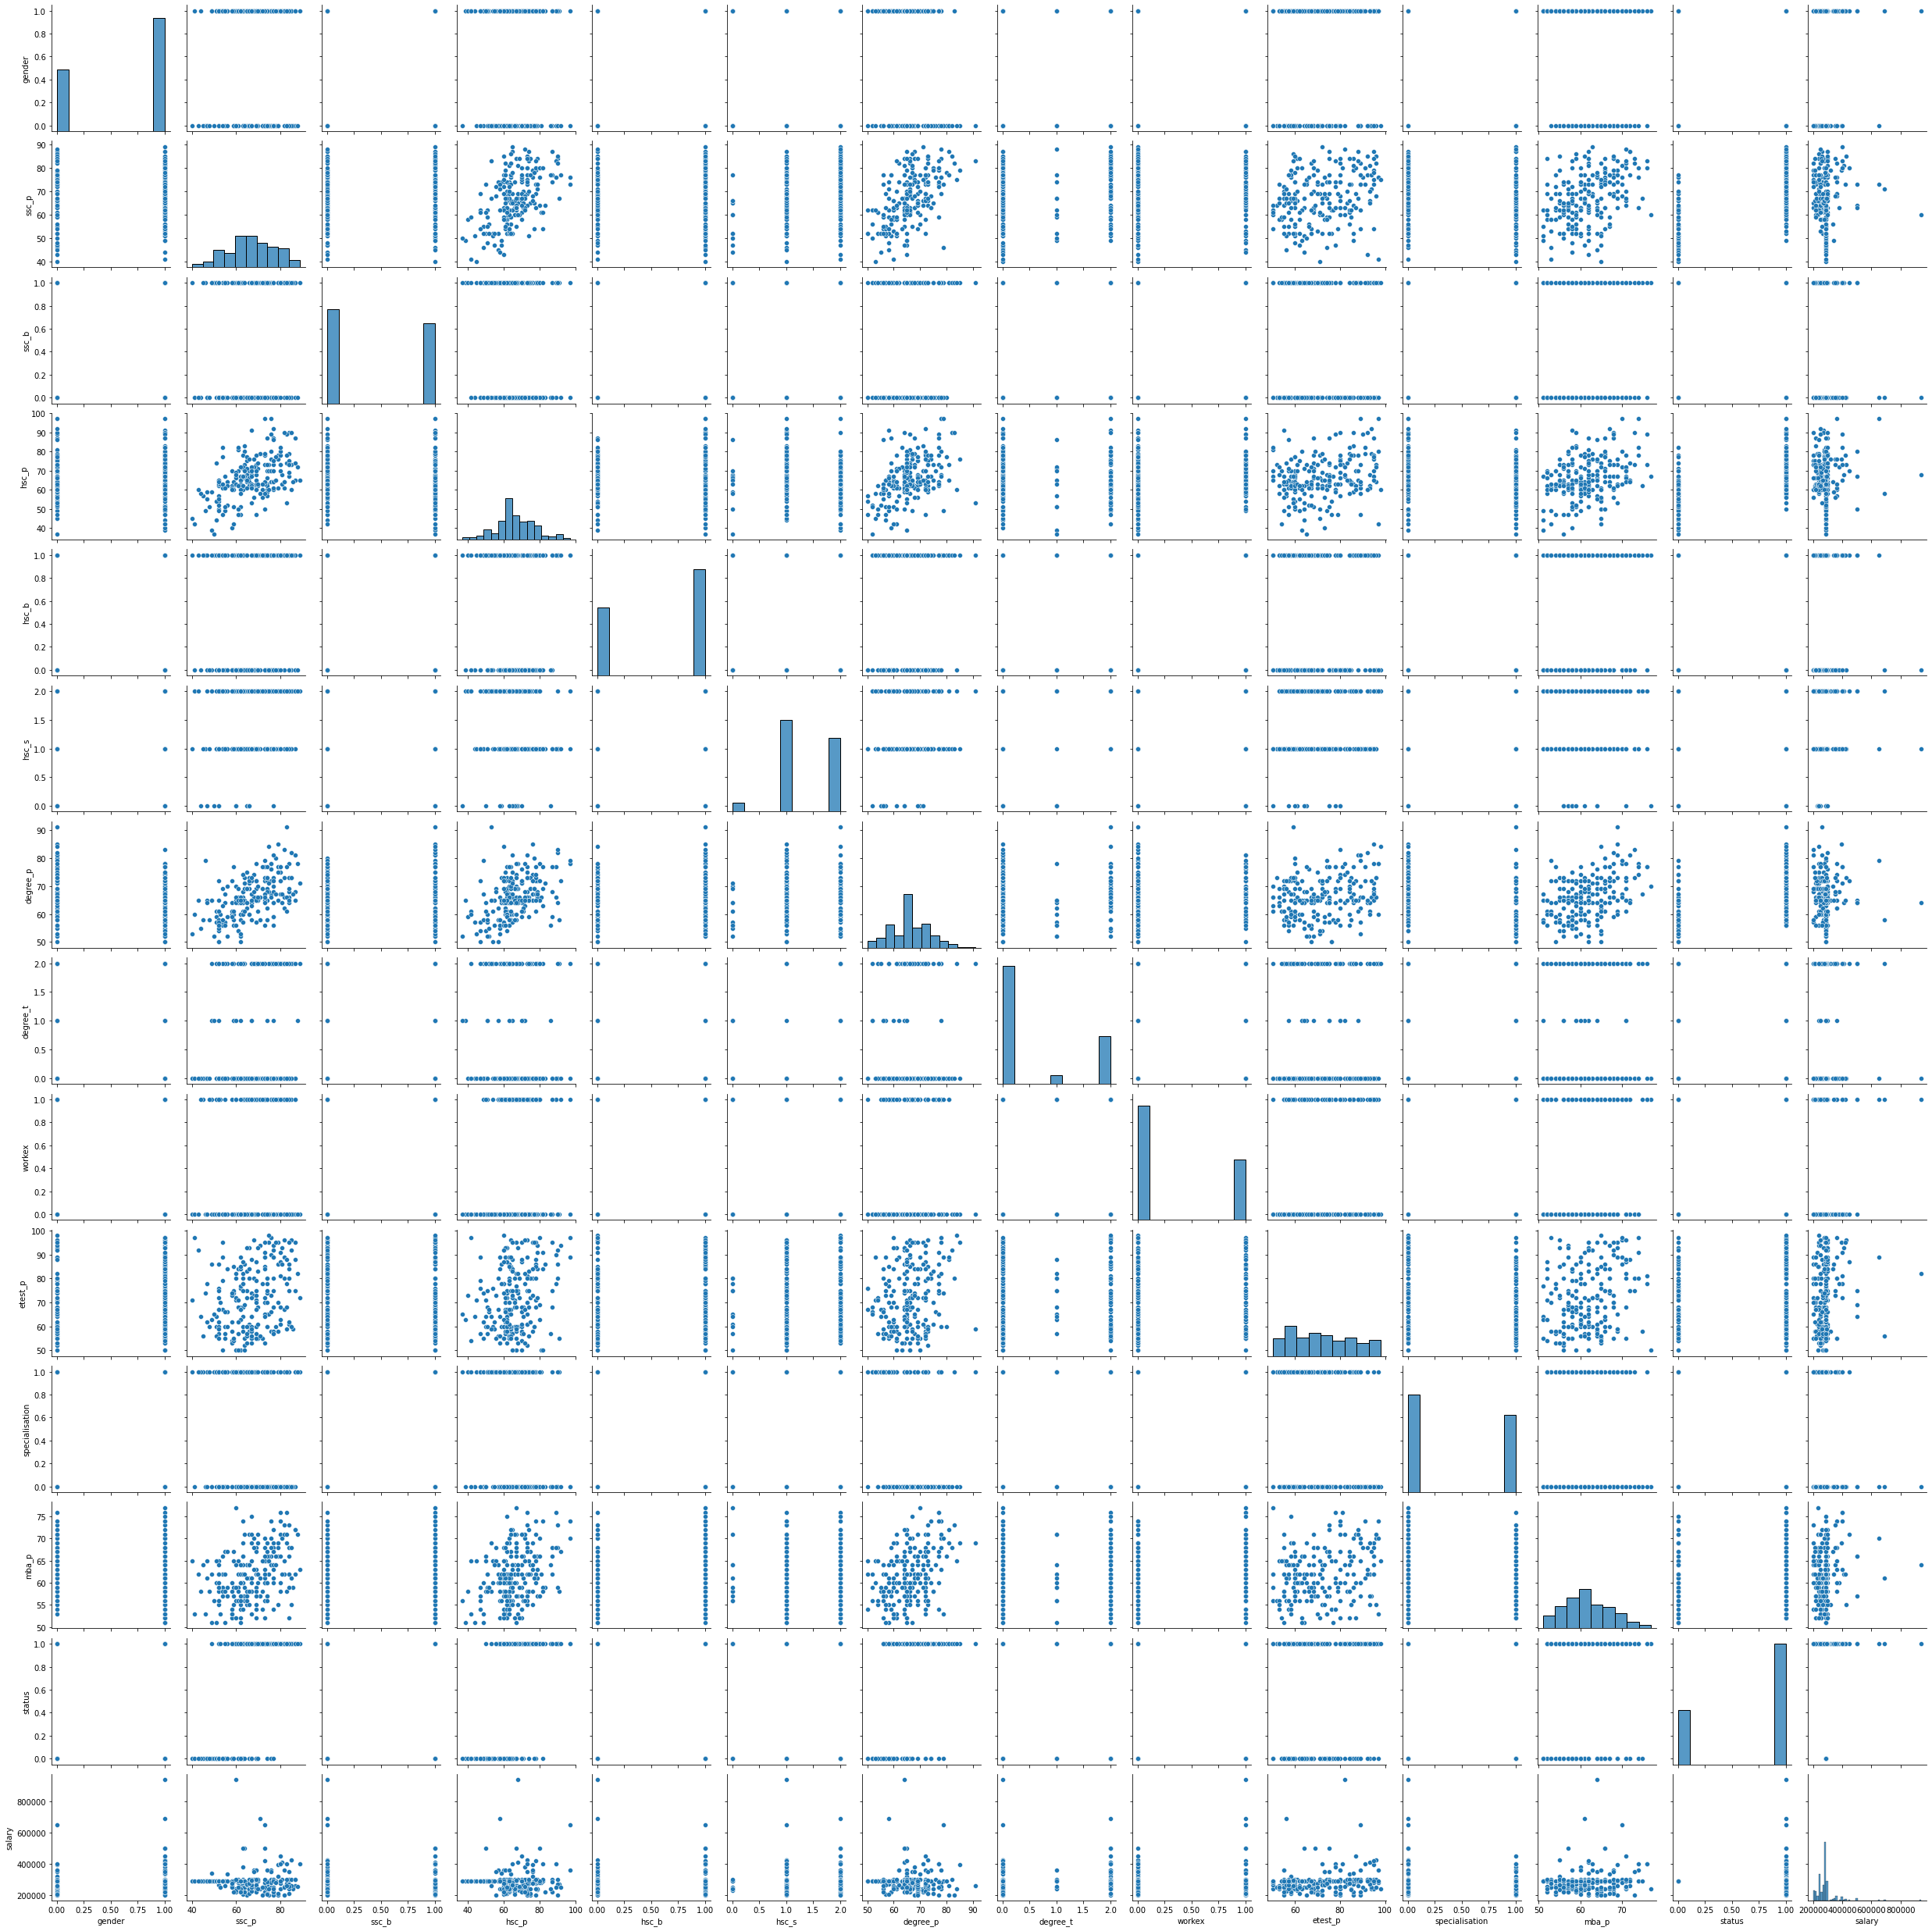

In [15]:
sns.pairplot(df)

<AxesSubplot:>

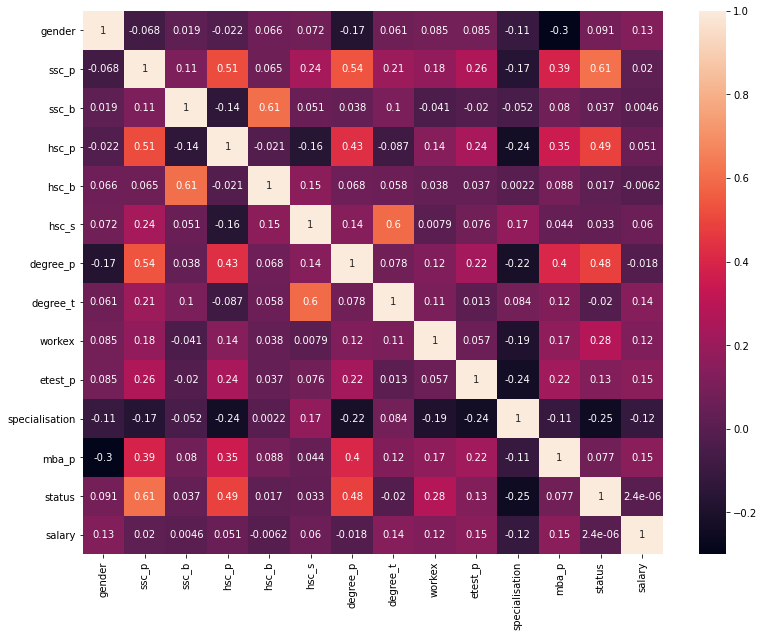

In [16]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

In [17]:
X = df.drop('status',axis=1)
y = df['status']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
knn_pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
confusion_matrix(y_test,knn_pred)

array([[21,  0],
       [ 1, 43]])

In [26]:
error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    error_rate.append(np.mean(knn_pred != y_test))

Text(0, 0.5, 'Error_rate')

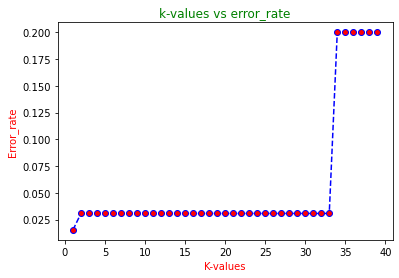

In [27]:
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('k-values vs error_rate',color='green')
plt.xlabel('K-values',color='Red',size=10)
plt.ylabel('Error_rate',color='red')

In [28]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [29]:
knn.score(X_train,y_train)

0.9733333333333334

In [30]:
confusion_matrix(y_test,knn_pred)

array([[21,  0],
       [ 2, 42]])

In [31]:
accuracy_score(y_test,knn_pred)

0.9692307692307692

In [32]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.95      0.98        44

    accuracy                           0.97        65
   macro avg       0.96      0.98      0.97        65
weighted avg       0.97      0.97      0.97        65

